In [1]:
import pandas as pd
from plotnine import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
%pwd

'C:\\Users\\SKTelecom\\Desktop\\github\\data_analysis'

In [6]:
%ls  ../data/공공데이터_분양가격정보

매개 변수 포맷이 틀립니다 - "data".


In [7]:
data = pd.read_csv('../data/공공데이터_분양가격정보/전국_평균_분양가격_2019.2월_.csv', encoding='euc-kr',engine='python')

In [9]:
print(data.shape)
data.head()

(3485, 5)


,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [10]:
#분양가격 데이터 type이 숫자형이 아님
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 5 columns):
지역명        3485 non-null object
규모구분       3485 non-null object
연도         3485 non-null int64
월          3485 non-null int64
분양가격(㎡)    3289 non-null object
dtypes: int64(2), object(3)
memory usage: 136.2+ KB


In [11]:
data['분양가격(㎡)']=pd.to_numeric(data['분양가격(㎡)'], errors='coerce')
data['분양가격(㎡)'].dtype

dtype('float64')

In [15]:
#df의 값 중, 숫자형이 아닌 경우 숫자형으로 데이터 type변경 method.
#pd.to_numeric?

In [16]:
data.dtypes

지역명         object
규모구분        object
연도           int64
월            int64
분양가격(㎡)    float64
dtype: object

In [17]:
#컬럼별 missing data %
data.isnull().sum()/len(data) * 100 

지역명        0.000000
규모구분       0.000000
연도         0.000000
월          0.000000
분양가격(㎡)    8.263989
dtype: float64

In [18]:
data['평당분양가']=data['분양가격(㎡)']*3.3

In [19]:
data.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가
0,서울,전체,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7


In [20]:
data.dtypes

지역명         object
규모구분        object
연도           int64
월            int64
분양가격(㎡)    float64
평당분양가      float64
dtype: object

In [21]:
data.describe()
#연도와 월 데이터는 카테고리 데이터 이므로 데이터 type 변경이 필요함

,연도,월,분양가격(㎡),평당분양가
count,3485.000000,3485.000000,3197.000000,3197.000000
mean,2016.951220,6.585366,3120.773225,10298.551642
std,1.034939,3.636223,1136.384699,3750.069506
min,2015.000000,1.000000,1868.000000,6164.400000
25%,2016.000000,3.000000,2383.000000,7863.900000
50%,2017.000000,7.000000,2779.000000,9170.700000
75%,2018.000000,10.000000,3363.000000,11097.900000
max,2019.000000,12.000000,8141.000000,26865.300000


In [22]:
data['연도']=data['연도'].astype(str)
data['월']=data['월'].astype(str)

In [23]:
data.describe()
#나머지 categorical data도 describe 가능

,분양가격(㎡),평당분양가
count,3197.000000,3197.000000
mean,3120.773225,10298.551642
std,1136.384699,3750.069506
min,1868.000000,6164.400000
25%,2383.000000,7863.900000
50%,2779.000000,9170.700000
75%,3363.000000,11097.900000
max,8141.000000,26865.300000


In [24]:
#object type data describe
data.describe(include=[np.object])

,지역명,규모구분,연도,월
count,3485,3485,3485,3485
unique,17,5,5,12
top,세종,전용면적 102㎡초과,2018,2
freq,205,697,1020,340


In [25]:
data.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가
0,서울,전체,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7


### pivot_table과 groupby 

In [26]:
#data.groupby?
#data.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, observed=False, **kwargs)

In [27]:
pd.options.display.float_format = '{:,.0f}'.format
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500



data.groupby(['연도']).describe().T

연도              2015   2016   2017   2018   2019
분양가격(㎡) count    243    984    899    919    152
        mean   2,789  2,934  3,140  3,327  3,502
        std      977  1,071  1,108  1,186  1,293
        min    1,868  1,900  1,976  2,076  2,152
        25%    2,225  2,282  2,365  2,525  2,652
        50%    2,516  2,672  2,849  2,952  3,112
        75%    3,026  3,148  3,456  3,698  3,978
        max    7,092  8,096  7,887  8,098  8,141
평당분양가   count    243    984    899    919    152
        mean   9,203  9,683 10,360 10,979 11,555
        std    3,224  3,536  3,655  3,914  4,266
        min    6,164  6,270  6,521  6,851  7,102
        25%    7,342  7,531  7,804  8,332  8,751
        50%    8,303  8,818  9,402  9,742 10,268
        75%    9,984 10,390 11,405 12,203 13,129
        max   23,404 26,717 26,027 26,723 26,865

In [28]:
data.groupby(['연도','지역명'])['평당분양가'].mean()

연도    지역명
2015  강원     7,188
      경기    11,061
      경남     8,459
      경북     7,464
      광주     7,917
      대구     9,019
      대전     8,191
      부산    10,377
      서울    20,316
      세종     8,765
      울산     9,368
      인천    10,976
      전남     6,799
      전북     7,110
      제주     7,951
      충남     7,690
      충북     6,829
2016  강원     7,163
      경기    11,685
      경남     8,497
      경북     7,753
      광주     9,191
      대구    10,282
      대전     8,911
      부산    10,744
      서울    21,753
      세종     8,858
      울산     9,583
      인천    11,099
      전남     6,937
      전북     6,907
      제주     9,567
      충남     7,958
      충북     7,133
2017  강원     7,274
      경기    12,305
      경남     8,787
      경북     8,281
      광주     9,614
      대구    12,207
      대전     9,957
      부산    11,561
      서울    21,831
      세종     9,133
      울산    10,667
      인천    11,641
      전남     7,373
      전북     7,399
      제주    12,567
      충남     8,198
      충북     7,473
2018  강원     8,219
  

In [29]:
#data.pivot_table?
#data.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')

In [30]:
data.pivot_table('평당분양가','규모구분','연도',aggfunc='mean')

연도,2015,2016,2017,2018,2019
규모구분,,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,446","12,360"
전용면적 60㎡이하,"8,952","9,399","10,246","10,844","11,161"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,651","11,385"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,442","11,654"
전체,"8,893","9,293","9,901","10,676","11,254"


In [31]:
data.pivot_table('평당분양가',['지역명','규모구분'],'연도',aggfunc='mean')

연도                      2015   2016   2017   2018   2019
지역명 규모구분                                                
강원  전용면적 102㎡초과        7,164  7,590  7,768  8,770  7,653
    전용면적 60㎡이하         7,557  7,044  7,089  7,693  8,332
    전용면적 60㎡초과 85㎡이하   7,258  7,093  7,115  7,668  7,745
    전용면적 85㎡초과 102㎡이하  6,801  6,906  7,270  9,284 10,124
    전체                 7,160  7,011  7,127  7,681  7,785
경기  전용면적 102㎡초과       12,379 13,136 13,651 15,271 16,295
    전용면적 60㎡이하        10,448 11,744 12,381 14,397 14,659
    전용면적 60㎡초과 85㎡이하  10,730 11,236 11,746 13,157 13,913
    전용면적 85㎡초과 102㎡이하 11,370 11,089 11,897 15,281 16,373
    전체                10,377 11,220 11,850 13,186 14,048
경남  전용면적 102㎡초과        9,984  8,911  9,237  9,737 12,220
    전용면적 60㎡이하         7,391  7,991  8,499  9,266  9,527
    전용면적 60㎡초과 85㎡이하   7,652  7,849  8,072  8,940  9,608
    전용면적 85㎡초과 102㎡이하  9,684  9,885 10,006  9,677 10,471
    전체                 7,586  7,848  8,120  9,019  9,676
경북  전용면적 102㎡초과        7,658  8,075  8,956  9,442  9,725
    전용면적 60㎡이하         7,251  7,213  7,900  8,264  8,204
    전용면적 60㎡초과 85㎡이하   7,166  7,396  7,771  8,478  8,682
    전용면적 85㎡초과 102㎡이하  8,074  8,722  9,052  8,784  8,801
    전체                 7,171  7,361  7,795  8,505  8,728
광주  전용면적 102㎡초과          nan 11,114 10,658  8,622    nan
    전용면적 60㎡이하         7,589  8,354  8,559  9,548 10,583
    전용면적 60㎡초과 85㎡이하   8,109  8,919  9,452  9,856 10,933
    전용면적 85㎡초과 102㎡이하    nan  9,134  9,442    nan    nan
    전체                 8,052  8,899  9,464  9,856 10,926
대구  전용면적 102㎡초과        8,892 10,550 15,087 12,846 13,421
    전용면적 60㎡이하         9,239 10,930 11,852 12,141 13,124
    전용면적 60㎡초과 85㎡이하   9,320 10,372 11,463 12,079 13,098
    전용면적 85㎡초과 102㎡이하  8,411  9,248 10,316 11,360 13,263
    전체                 9,232 10,310 11,456 12,076 13,152
대전  전용면적 102㎡초과          nan 14,282 14,282 16,094 16,094
    전용면적 60㎡이하         8,530  8,736  9,253  8,282    nan
    전용면적 60㎡초과 85㎡이하   8,012  8,432  8,921 10,180 12,134
    전용면적 85㎡초과 102㎡이하  8,121  8,351  9,071 10,121    nan
    전체                 8,098  8,502  9,045 10,180 12,174
부산  전용면적 102㎡초과       12,076 12,610 12,633 13,182 14,167
    전용면적 60㎡이하         9,771  9,916 10,849 12,385 12,467
    전용면적 60㎡초과 85㎡이하   9,975 10,214 11,651 12,926 13,411
    전용면적 85㎡초과 102㎡이하  9,758 10,548 11,093 12,959 13,418
    전체                10,307 10,430 11,578 12,998 13,424
서울  전용면적 102㎡초과       20,879 21,549 22,158 23,283 24,940
    전용면적 60㎡이하        20,122 21,744 21,897 23,395 24,839
    전용면적 60㎡초과 85㎡이하  19,593 20,788 20,635 22,756 26,806
    전용면적 85㎡초과 102㎡이하 21,259 24,022 23,089 23,688 22,579
    전체                19,725 20,663 21,376 22,889 25,125
세종  전용면적 102㎡초과        9,012  8,827  9,121 10,475  9,867
    전용면적 60㎡이하         8,520  8,878  9,156 10,111 10,111
    전용면적 60㎡초과 85㎡이하   8,799  8,922  9,058 10,376 10,108
    전용면적 85㎡초과 102㎡이하  8,744  8,801  9,194 10,328 10,412
    전체                 8,750  8,860  9,135 10,355 10,082
울산  전용면적 102㎡초과        9,282  9,903 10,268    nan    nan
    전용면적 60㎡이하         8,349  8,641  9,538    nan    nan
    전용면적 60㎡초과 85㎡이하  10,050 10,239 11,378 10,241    nan
    전용면적 85㎡초과 102㎡이하  9,105  8,788    nan    nan    nan
    전체                10,053 10,209 11,345 10,241    nan
인천  전용면적 102㎡초과       11,246 12,732 14,782 14,840 15,328
    전용면적 60㎡이하        11,158 10,430 10,784 11,510 11,411
    전용면적 60㎡초과 85㎡이하  10,293 10,479 10,744 11,631 12,449
    전용면적 85㎡초과 102㎡이하 11,698 11,322 11,156 11,139 11,524
    전체                10,484 10,532 10,737 11,274 11,835
전남  전용면적 102㎡초과        7,308  7,335  7,549  8,205  9,159
    전용면적 60㎡이하         6,597  6,632  7,202  7,403  7,303
    전용면적 60㎡초과 85㎡이하   6,307  6,481  7,181  7,755  7,935
    전용면적 85㎡초과 102㎡이하  7,465  7,746  7,745  8,497  7,712
    전체                 6,317  6,489  7,188  7,789  7,963
전북  전용면적 102㎡초과        7,495  7,650  7,580  8,825  8,917
    전용면적 60㎡이하         6,799  6,430  7,663  8,392  8,798
    전용면적 60㎡초과 85㎡이하   6,710  6,440  7,040  7,559  7,816
    전용면적 8

In [32]:
data_all=data.loc[data['규모구분']=='전체']
data_all.head(10)

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가
0,서울,전체,2015,10,"5,841","19,275"
5,인천,전체,2015,10,"3,163","10,438"
10,경기,전체,2015,10,"3,138","10,355"
15,부산,전체,2015,10,"3,112","10,270"
20,대구,전체,2015,10,"2,682","8,851"
25,광주,전체,2015,10,"2,420","7,986"
30,대전,전체,2015,10,"2,454","8,098"
35,울산,전체,2015,10,"3,053","10,075"
40,세종,전체,2015,10,"2,642","8,719"
45,강원,전체,2015,10,"2,167","7,151"


In [33]:
data_region_all=data_all.pivot_table('평당분양가','지역명','연도').reset_index()
data_region_all

연도,지역명,2015,2016,2017,2018,2019
0,강원,"7,160","7,011","7,127","7,681","7,785"
1,경기,"10,377","11,220","11,850","13,186","14,048"
2,경남,"7,586","7,848","8,120","9,019","9,676"
3,경북,"7,171","7,361","7,795","8,505","8,728"
4,광주,"8,052","8,899","9,464","9,856","10,926"
5,대구,"9,232","10,310","11,456","12,076","13,152"
6,대전,"8,098","8,502","9,045","10,180","12,174"
7,부산,"10,307","10,430","11,578","12,998","13,424"
8,서울,"19,725","20,663","21,376","22,889","25,125"
9,세종,"8,750","8,860","9,135","10,355","10,082"


In [34]:
#지역별 2019 평균 평당분양가 - '2015'~'201'8 평균 평당분양가를 변동액으로 정의
data_region_all['변동액']=data_region_all['2019']-data_region_all[['2015','2016','2017','2018']].mean(axis=1)
data_region_all['변동율(%)']=(data_region_all['2019']-data_region_all[['2015','2016','2017','2018']].mean(axis=1))/data_region_all[['2015','2016','2017','2018']].mean(axis=1)*100

data_region_all

연도,지역명,2015,2016,2017,2018,2019,변동액,변동율(%)
0,강원,"7,160","7,011","7,127","7,681","7,785",540,7
1,경기,"10,377","11,220","11,850","13,186","14,048","2,390",20
2,경남,"7,586","7,848","8,120","9,019","9,676","1,532",19
3,경북,"7,171","7,361","7,795","8,505","8,728","1,021",13
4,광주,"8,052","8,899","9,464","9,856","10,926","1,859",20
5,대구,"9,232","10,310","11,456","12,076","13,152","2,384",22
6,대전,"8,098","8,502","9,045","10,180","12,174","3,218",36
7,부산,"10,307","10,430","11,578","12,998","13,424","2,096",19
8,서울,"19,725","20,663","21,376","22,889","25,125","3,961",19
9,세종,"8,750","8,860","9,135","10,355","10,082",806,9


In [35]:
#data_region_all.sort_values?
#Signature: data_region_all.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
#변동액을 기준으로 내림차순으로 정리
data_region_all.sort_values('변동액', ascending=False)

연도,지역명,2015,2016,2017,2018,2019,변동액,변동율(%)
8,서울,"19,725","20,663","21,376","22,889","25,125","3,961",19
6,대전,"8,098","8,502","9,045","10,180","12,174","3,218",36
1,경기,"10,377","11,220","11,850","13,186","14,048","2,390",20
5,대구,"9,232","10,310","11,456","12,076","13,152","2,384",22
7,부산,"10,307","10,430","11,578","12,998","13,424","2,096",19
4,광주,"8,052","8,899","9,464","9,856","10,926","1,859",20
2,경남,"7,586","7,848","8,120","9,019","9,676","1,532",19
14,제주,"7,405","9,129","10,831","11,891","11,299","1,485",15
11,인천,"10,484","10,532","10,737","11,274","11,835","1,079",10
3,경북,"7,171","7,361","7,795","8,505","8,728","1,021",13


### Visualization

* ggplot과 matplotlib & seaborn의 조합 비교

In [67]:
#ggplot?

In [71]:
#matplotlib 한글 폰트 개별 지정
#https://financedata.github.io/posts/matplotlib-hangul-for-windows-anaconda.html
from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/뫼비우스 Regular.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()


C:\Users\SKTelecom\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_bar : Removed 20 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


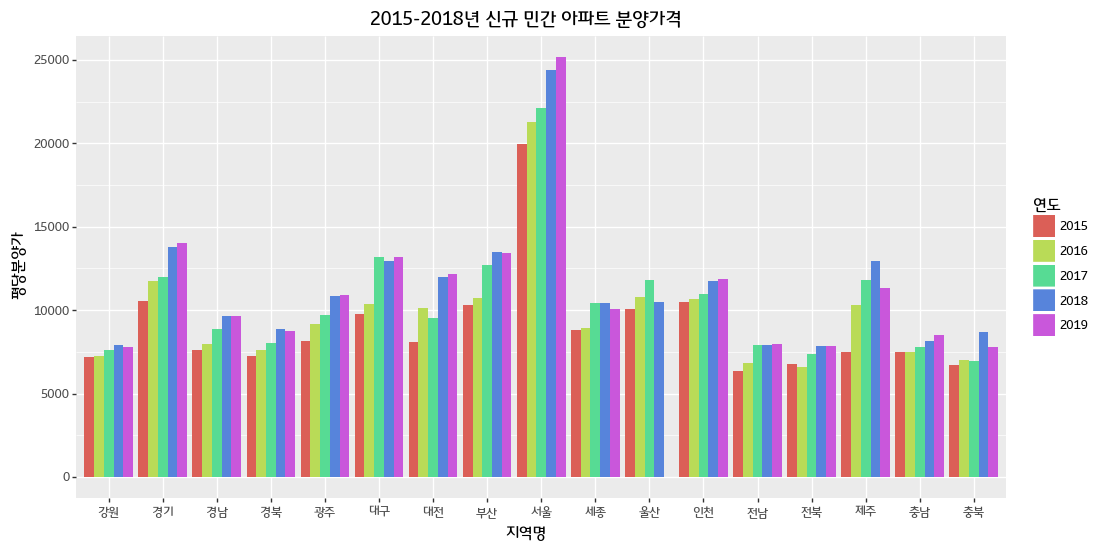

<ggplot: (-9223371869461245233)>

In [76]:
(ggplot(data_all, aes(x='지역명', y='평당분양가', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('2015-2018년 신규 민간 아파트 분양가격')
    #font_family변수는 위에서 지정한 matplotlib 한글 글자 폰트 임
 + theme(text=element_text(family=font_family),
         figure_size=(12, 6))
)

C:\Users\SKTelecom\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_bar : Removed 288 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


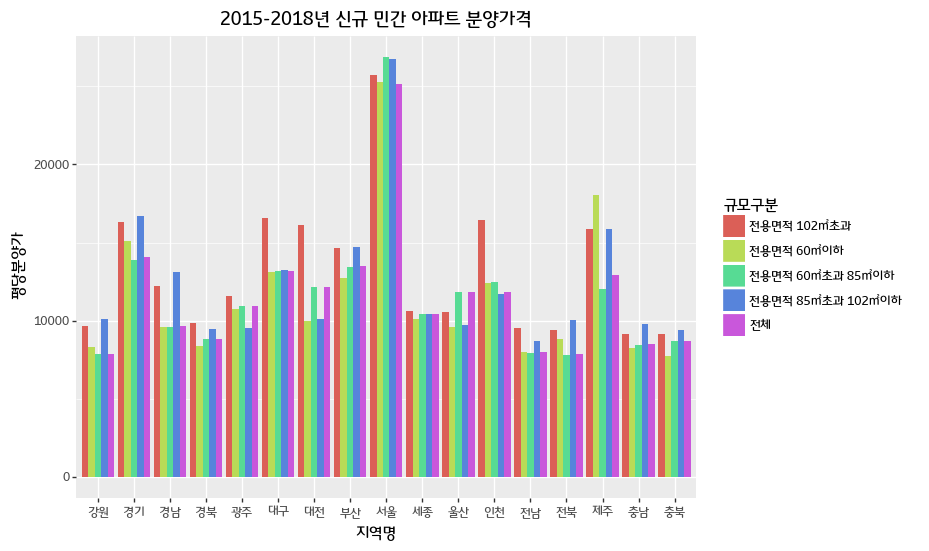

<ggplot: (-9223371869461022236)>

In [78]:
(ggplot(data, aes(x='지역명', y='평당분양가', fill='규모구분'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('2015-2018년 신규 민간 아파트 분양가격')
    #font_family변수는 위에서 지정한 matplotlib 한글 글자 폰트 임
 + theme(text=element_text(family=font_family),
         figure_size=(8, 6))
)

In [80]:
# sns.barplot?
# sns.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x0000026F90D20840>, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)

Text(0.5, 1.0, '연간 지역별 평당분양가')

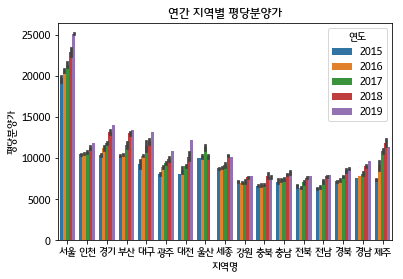

In [116]:
#plt 없이 단일 ploting
sns.barplot('지역명','평당분양가','연도',data_all)
plt.title("연간 지역별 평당분양가")

[Text(0.5, 1.0, '연간 지역별 평당분양가')]

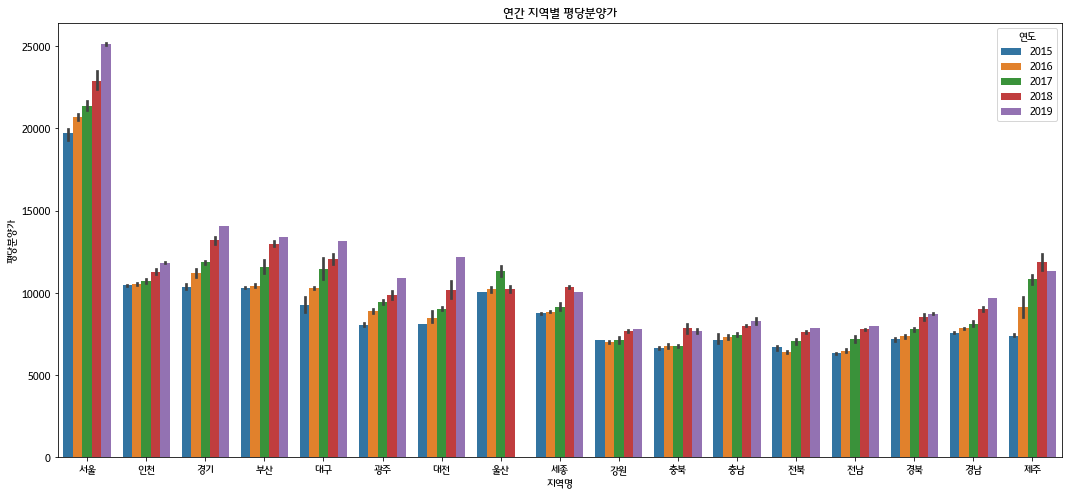

In [104]:
#subplots 개념으로 ploting
fig, ax = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(18,8)

sns.barplot('지역명','평당분양가','연도',data_all, ax=ax)

ax.set(title="연간 지역별 평당분양가")

Text(0.5, 1.0, '연간 지역별 평당분양가')

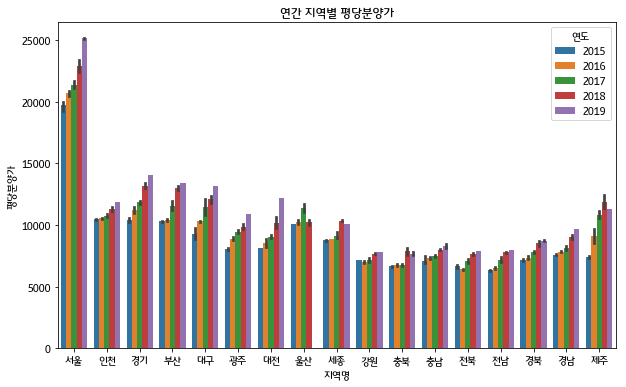

In [108]:
#단일 ploting
fig= plt.figure(figsize=(10,6))
sns.barplot('지역명','평당분양가','연도',data_all)

plt.title("연간 지역별 평당분양가")

In [132]:
#sns.boxplot?
# sns.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)
#https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

Text(0.5, 1.0, '연간 지역별 평당분양가')

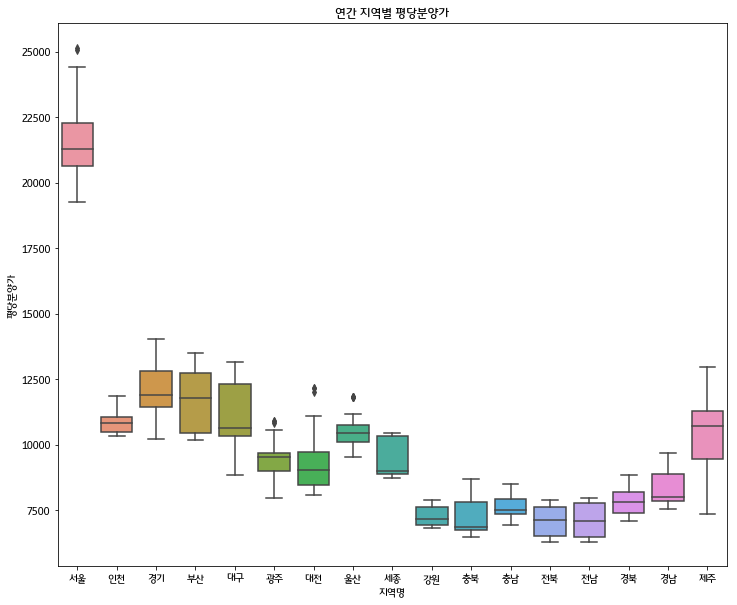

In [129]:
fig= plt.figure(figsize=(12,10))
sns.boxplot('지역명','평당분양가', data=data_all)

plt.title("연간 지역별 평당분양가")

In [131]:
plt.title?